In [ ]:
!pip install fasteda

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from fasteda import fast_eda
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
data=pd.read_csv("/content/migrants.csv")

In [ ]:
data.head(5)

,S.No.,Country,Population,Yearly _Change,Net _Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,Urban_Pop,World_Share
0,1,India,1428627663,0.0081,11454490,481,2973190,-486136,2.0,28.0,36%,0.1776
1,2,China,1425671352,-0.0002,-215985,152,9388211,-310220,1.2,39.0,65%,0.1772
2,3,United States,339996563,0.0050,1706706,37,9147420,999700,1.7,38.0,83%,0.0423
3,4,Indonesia,277534122,0.0074,2032783,153,1811570,-49997,2.1,30.0,59%,0.0345
4,5,Pakistan,240485658,0.0198,4660796,312,770880,-165988,3.3,21.0,35%,0.0299


In [ ]:
data.drop('S.No.',axis=1,inplace=True)

In [ ]:
data.replace("N.A.","",inplace=True)

## Imputing Missing Values
### Numeric Values with Mean


In [ ]:
num = data.select_dtypes(include = np.number).columns
data[num]=data[num].apply(pd.to_numeric,errors='coerce')
data[num]=data[num].fillna(data[num].mean())
data[num]

,Population,Yearly _Change,Net _Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,World_Share
0,1428627663,0.0081,11454490,481,2973190,-486136,2.000000,28.000000,0.1776
1,1425671352,-0.0002,-215985,152,9388211,-310220,1.200000,39.000000,0.1772
2,339996563,0.0050,1706706,37,9147420,999700,1.700000,38.000000,0.0423
3,277534122,0.0074,2032783,153,1811570,-49997,2.100000,30.000000,0.0345
4,240485658,0.0198,4660796,312,770880,-165988,3.300000,21.000000,0.0299
...,...,...,...,...,...,...,...,...,...
229,4386,-0.0009,-4,44,100,0,1.600000,44.000000,0.0000
230,3791,0.0029,11,0,12170,0,1.600000,40.000000,0.0000
231,1935,0.0005,1,7,260,0,2.400000,36.000000,0.0000
232,1893,0.0118,22,189,10,0,2.600000,27.000000,0.0000


In [ ]:
# Example: Fill missing categorical values with the most frequent value
categorical_cols = data.select_dtypes(include='object').columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# EDA

DataFrame Head:


,Population,Yearly _Change,Net _Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,World_Share
0,1428627663,0.0081,11454490,481,2973190,-486136,2.0,28.0,0.1776
1,1425671352,-0.0002,-215985,152,9388211,-310220,1.2,39.0,0.1772
2,339996563,0.0050,1706706,37,9147420,999700,1.7,38.0,0.0423


DataFrame Tail:


,Population,Yearly _Change,Net _Change,Density,Land_Area,Migrants,Fert_Rate,Med_Age,World_Share
231,1935,0.0005,1,7,260,0,2.400000,36.000000,0.0
232,1893,0.0118,22,189,10,0,2.600000,27.000000,0.0
233,518,0.0157,8,1295,0,0,2.414163,31.309013,0.0


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(234, 9)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Population      234 non-null    int64  
 1   Yearly _Change  234 non-null    float64
 2   Net _Change     234 non-null    int64  
 3   Density         234 non-null    int64  
 4   Land_Area       234 non-null    int64  
 5   Migrants        234 non-null    int64  
 6   Fert_Rate       234 non-null    float64
 7   Med_Age         234 non-null    float64
 8   World_Share     234 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 16.6 KB
----------------------------------------------------------------------------------------------------

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
Population,234,34375647.876,5643895,137386102.421,518,469648.25,5643895,23245367.25,1428627663,9.075228,88.262863
Yearly _Change,234,0.01,0.008,0.012,-0.074,0.002,0.008,0.017,0.05,-0.914492,8.453099
Net _Change,234,300023.034,28601.5,1001814.934,-2957105,236,28601.5,223685.5,11454490,6.977090,68.654365
Density,234,477.415,96.5,2320.694,0,38.25,96.5,242,24360,9.163811,87.839990
Land_Area,234,555956.808,79720,1691023.738,0,2650,79720,407080,16376870,6.033349,42.285523
Migrants,234,13.013,-500,169833.38,-910475,-9776.75,-500,475,1784718,5.414629,60.571482
Fert_Rate,234,2.414,2,1.153,0.8,1.6,2,2.975,6.7,1.276289,1.230834
Med_Age,234,31.309,32,9.608,15,22.25,32,40,54,-0.012519,-1.126409
World_Share,234,0.004,0.001,0.017,0,0,0.001,0.003,0.178,9.074111,88.246773


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



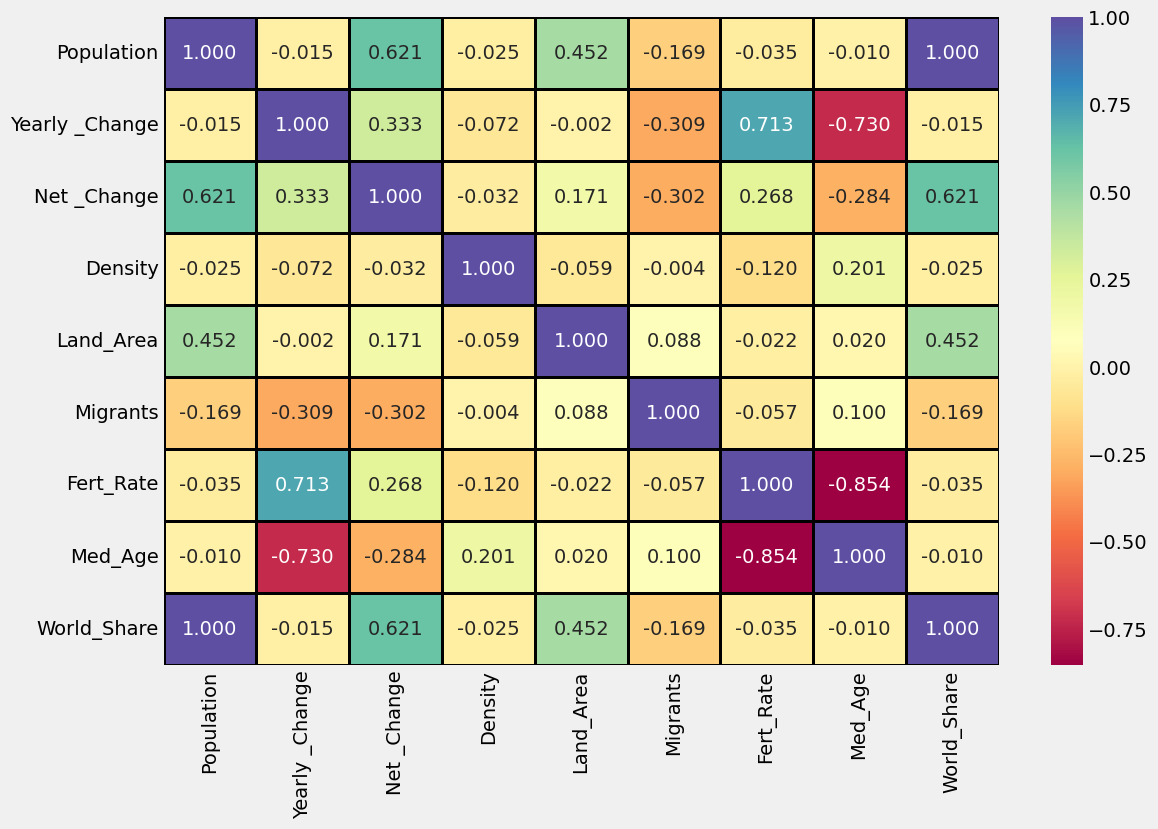

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



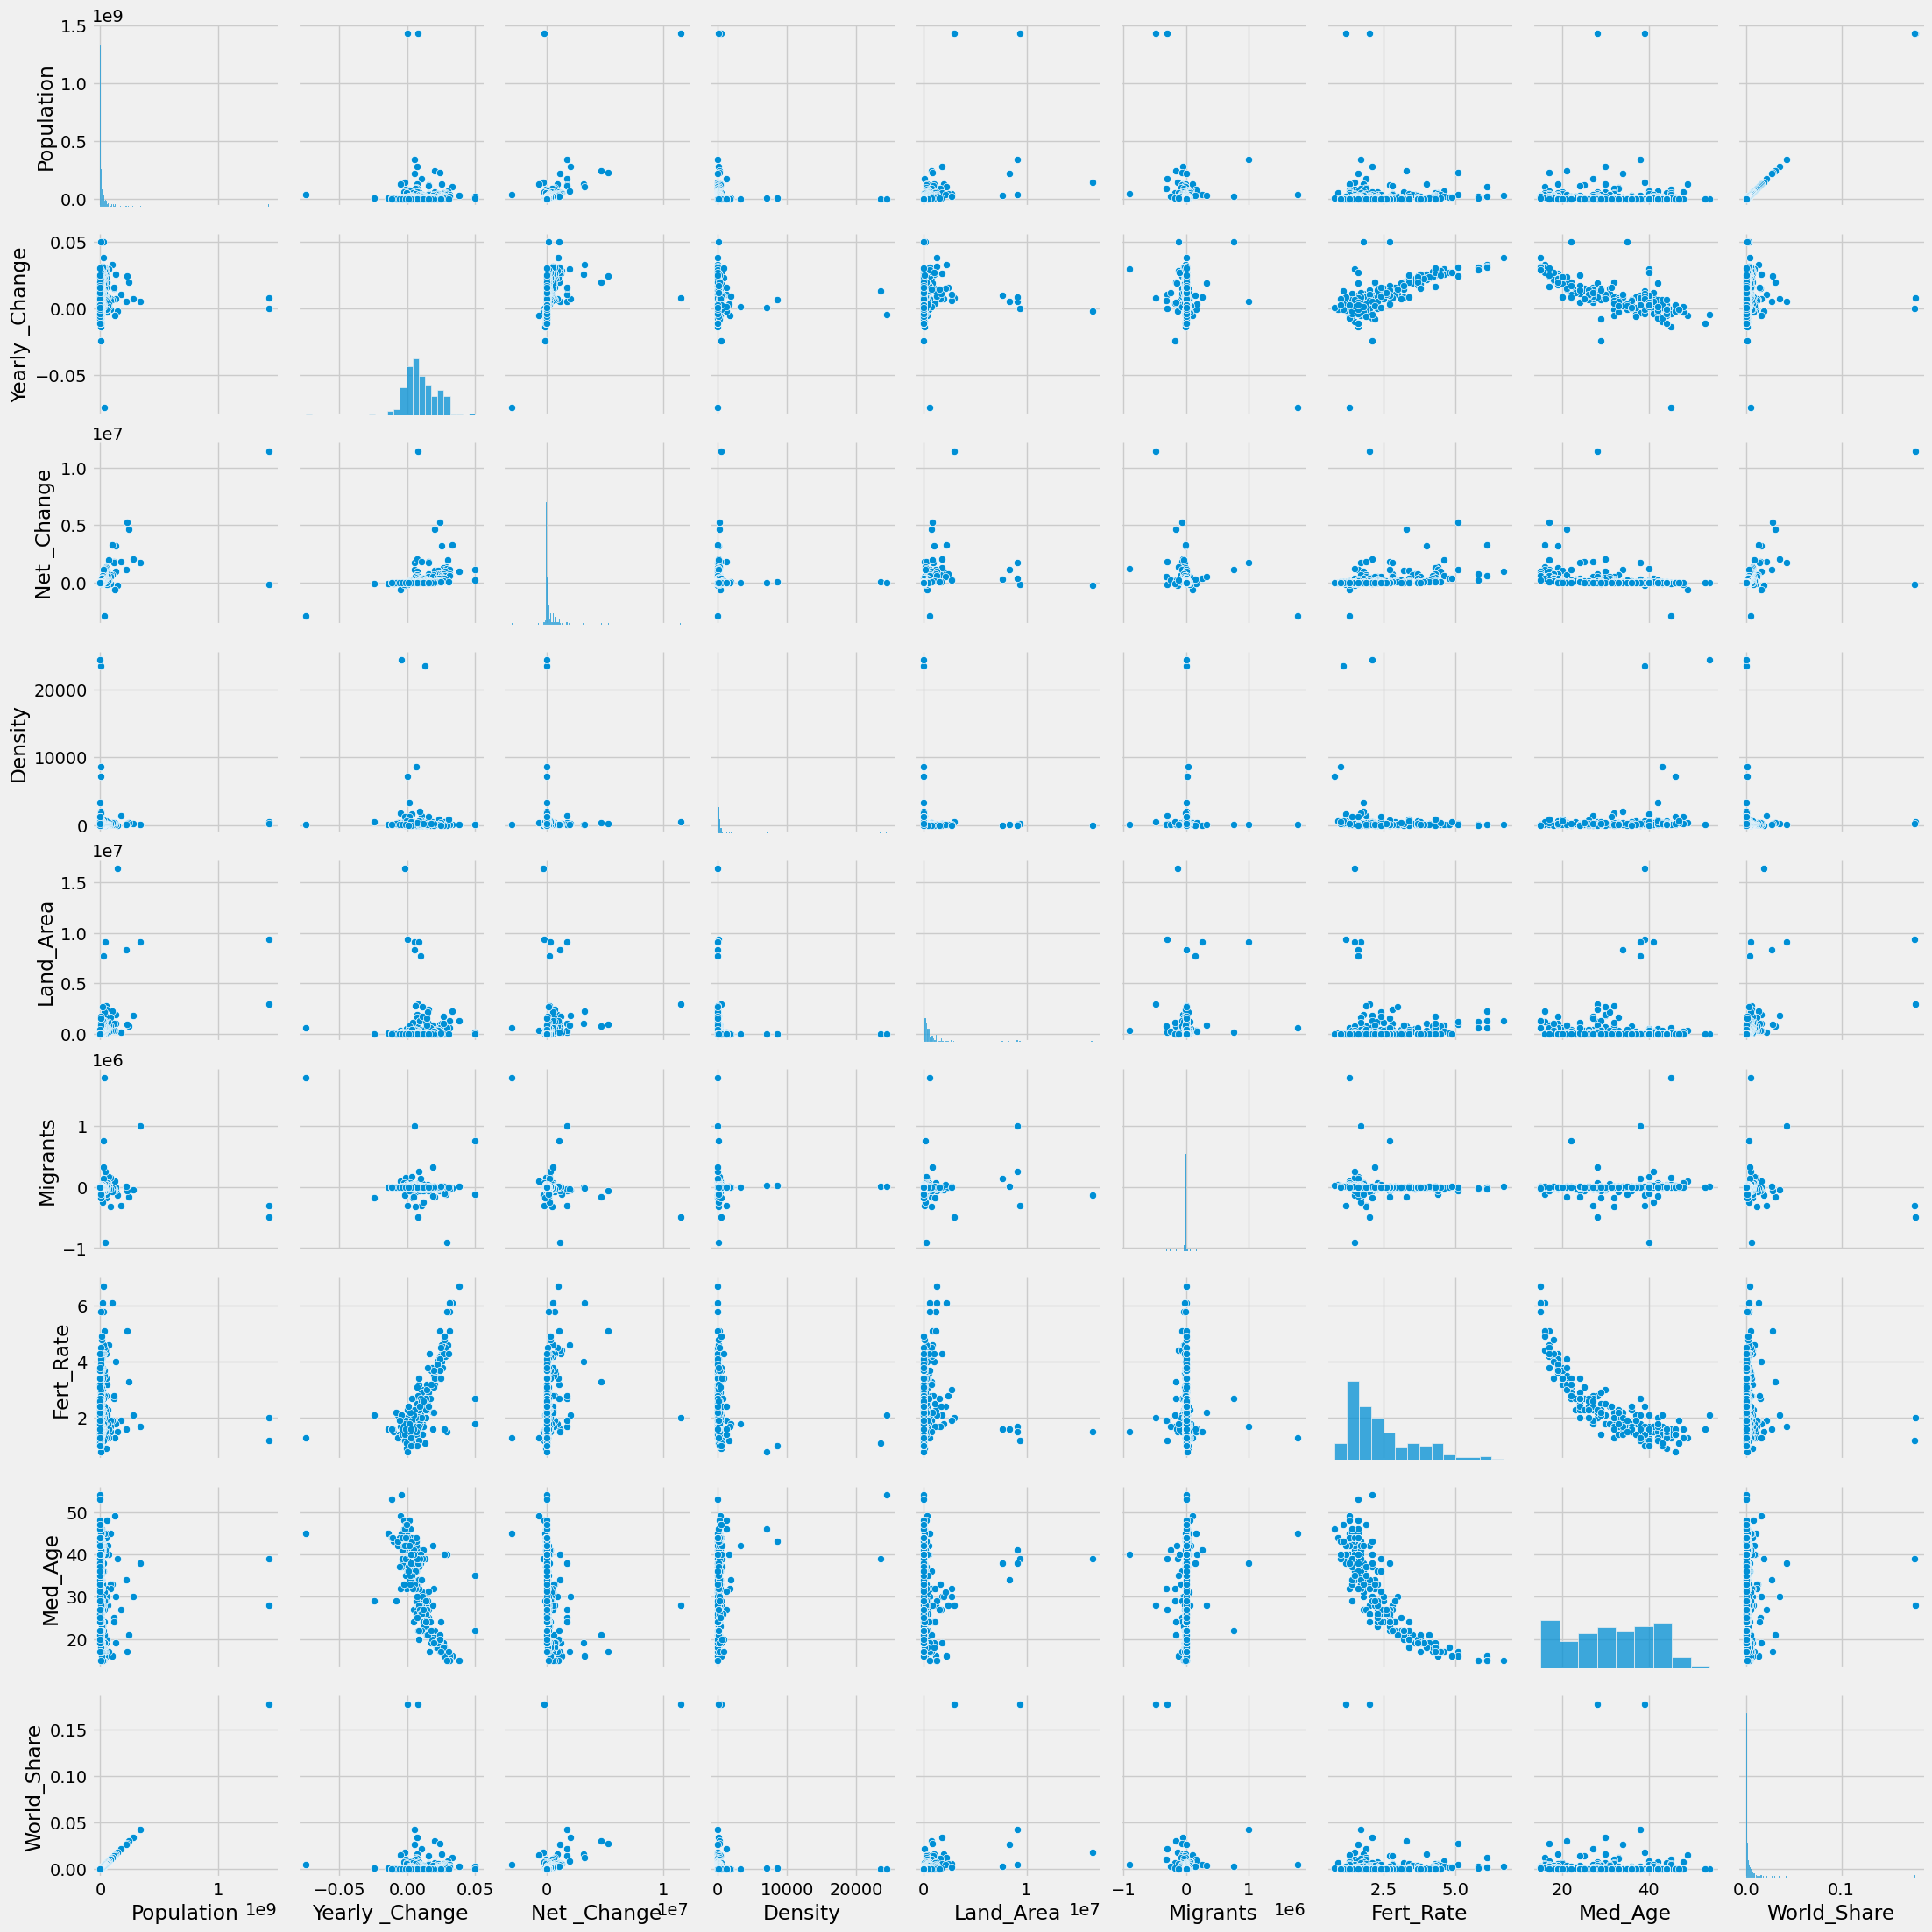

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



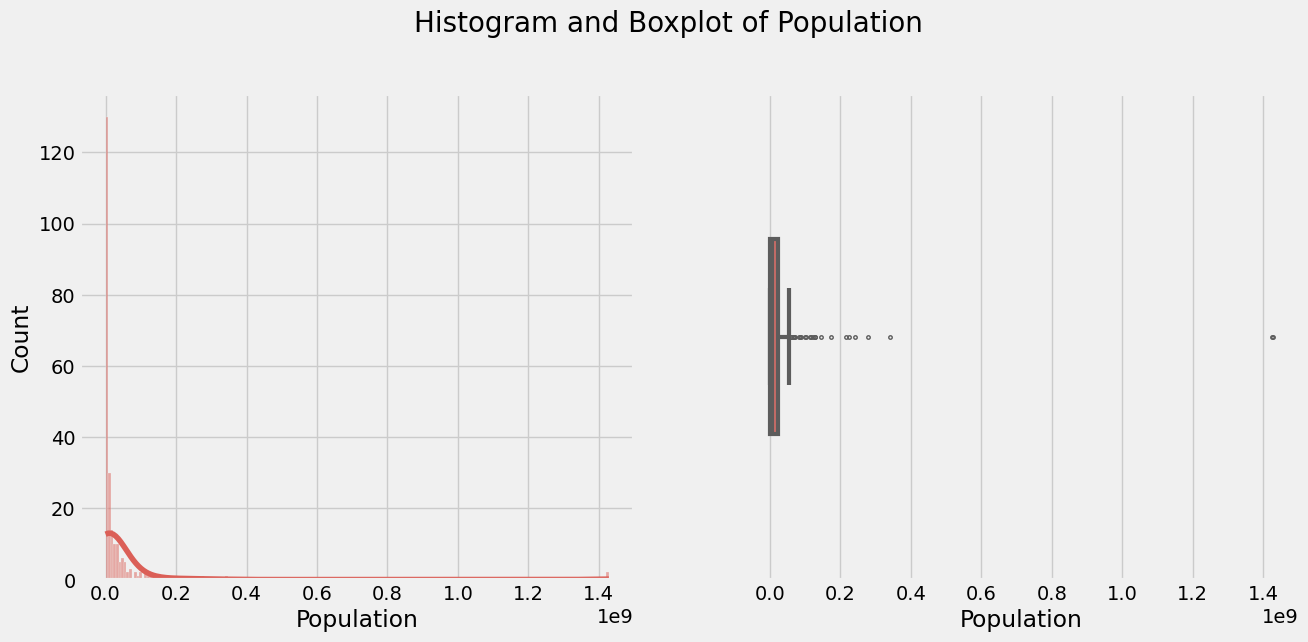

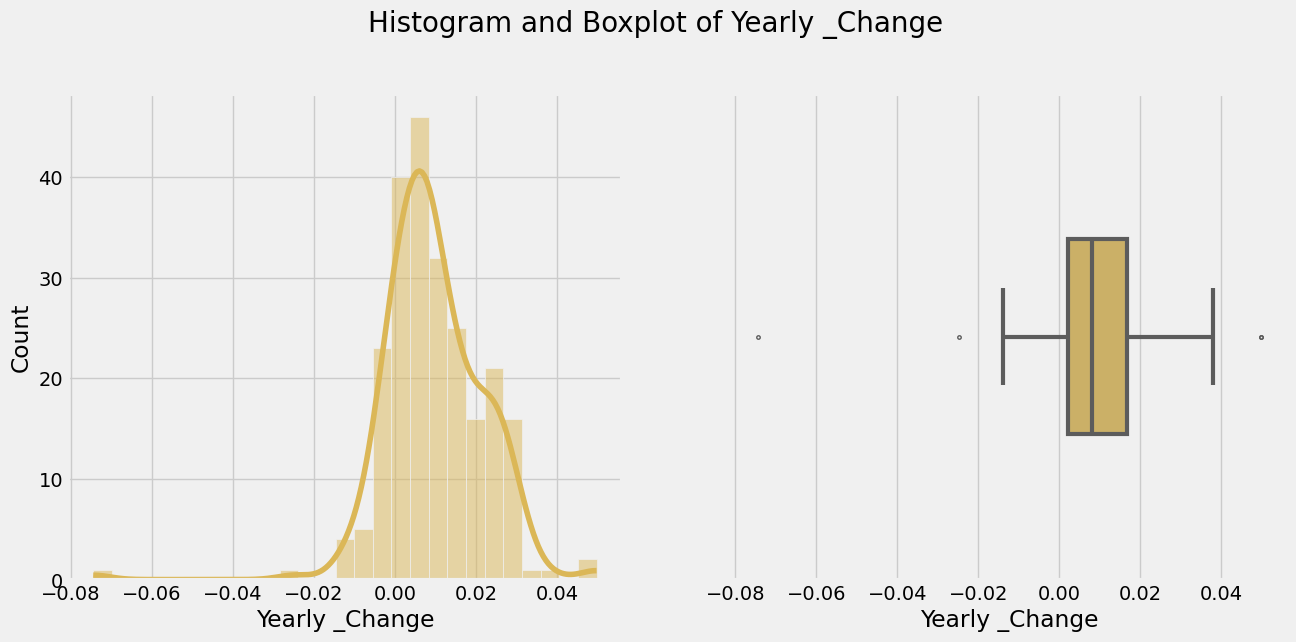

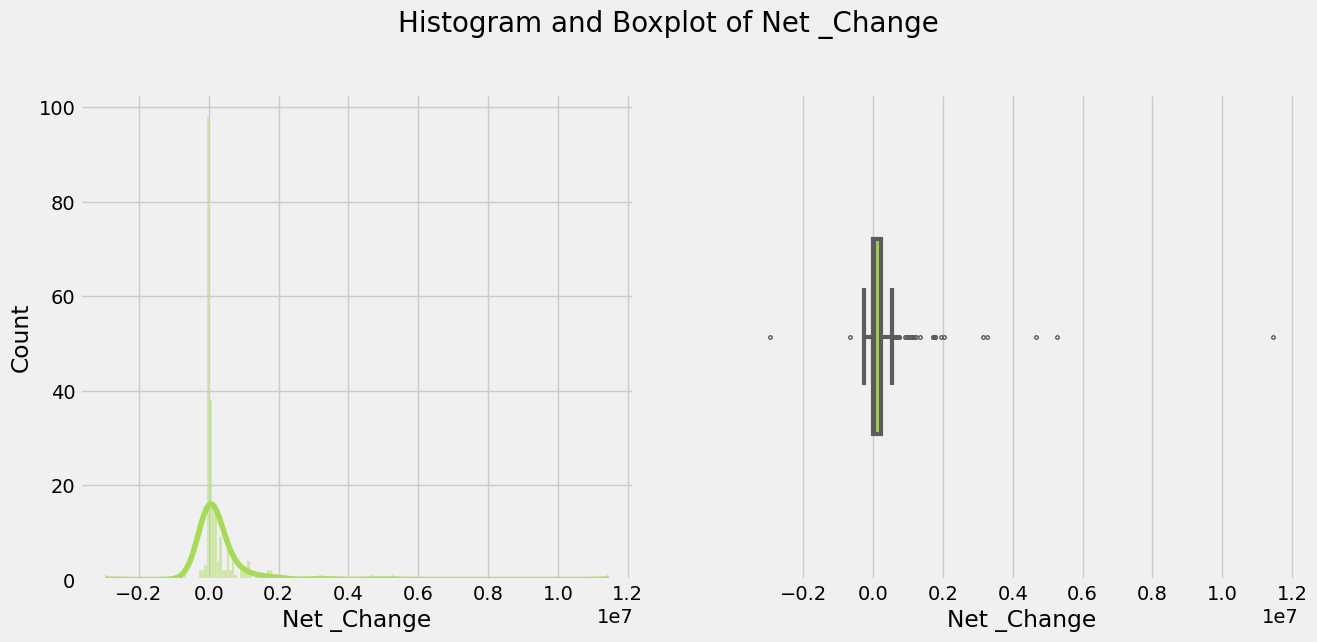

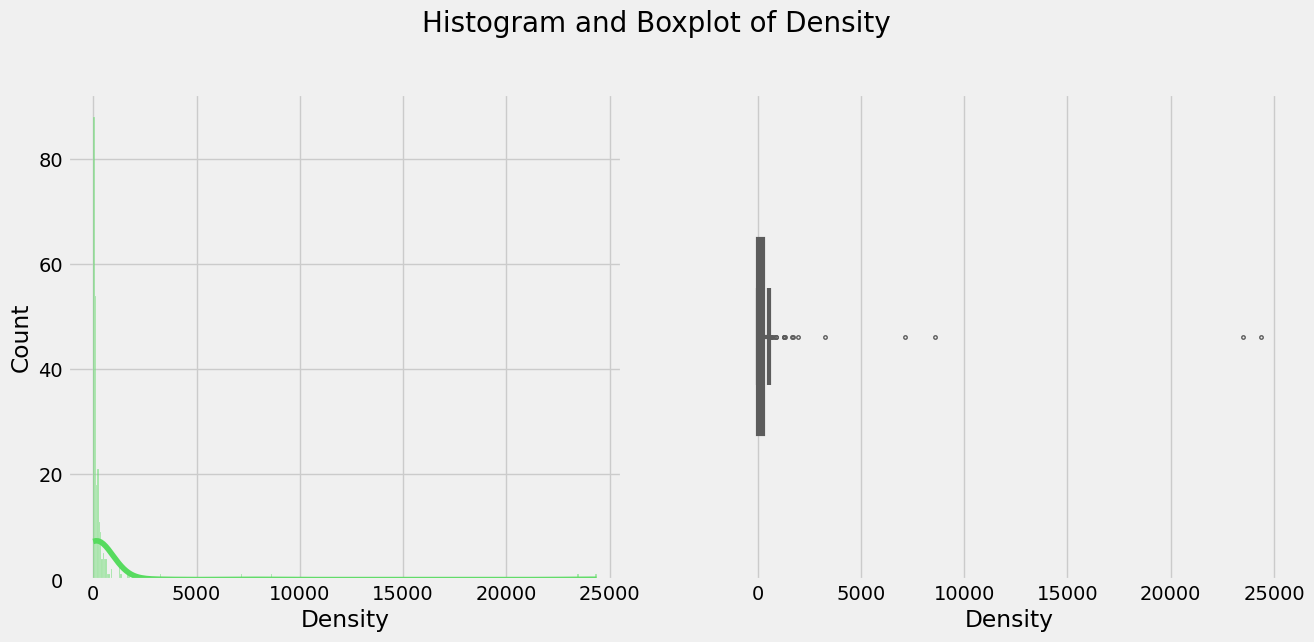

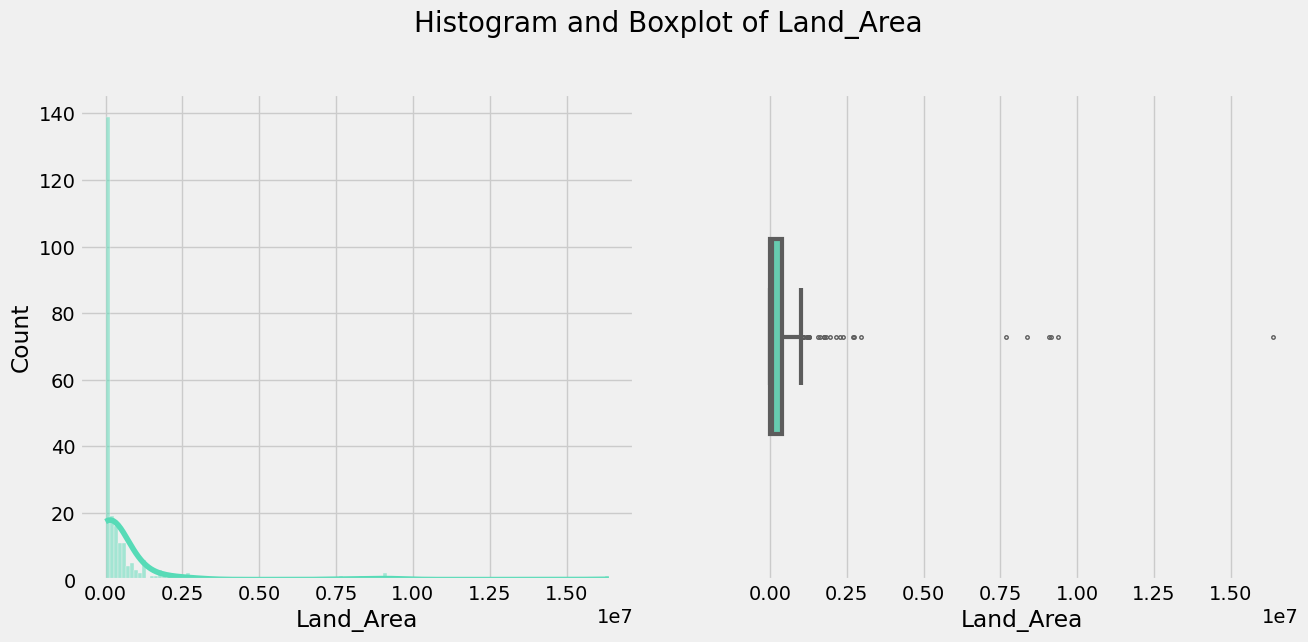

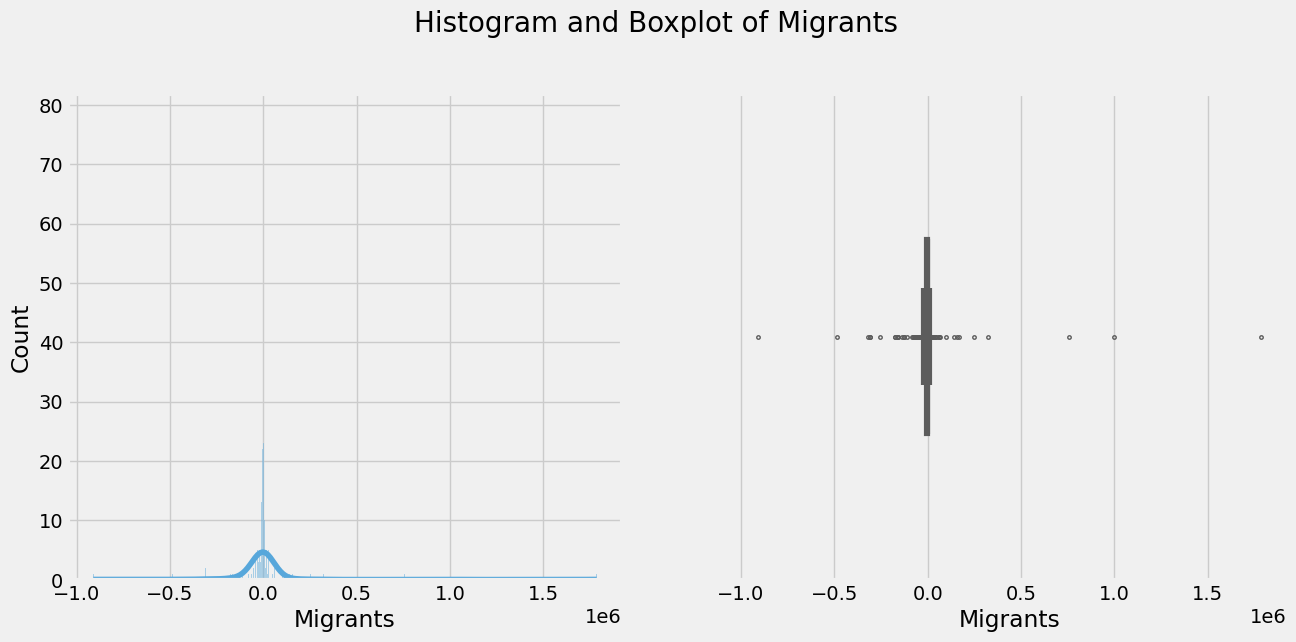

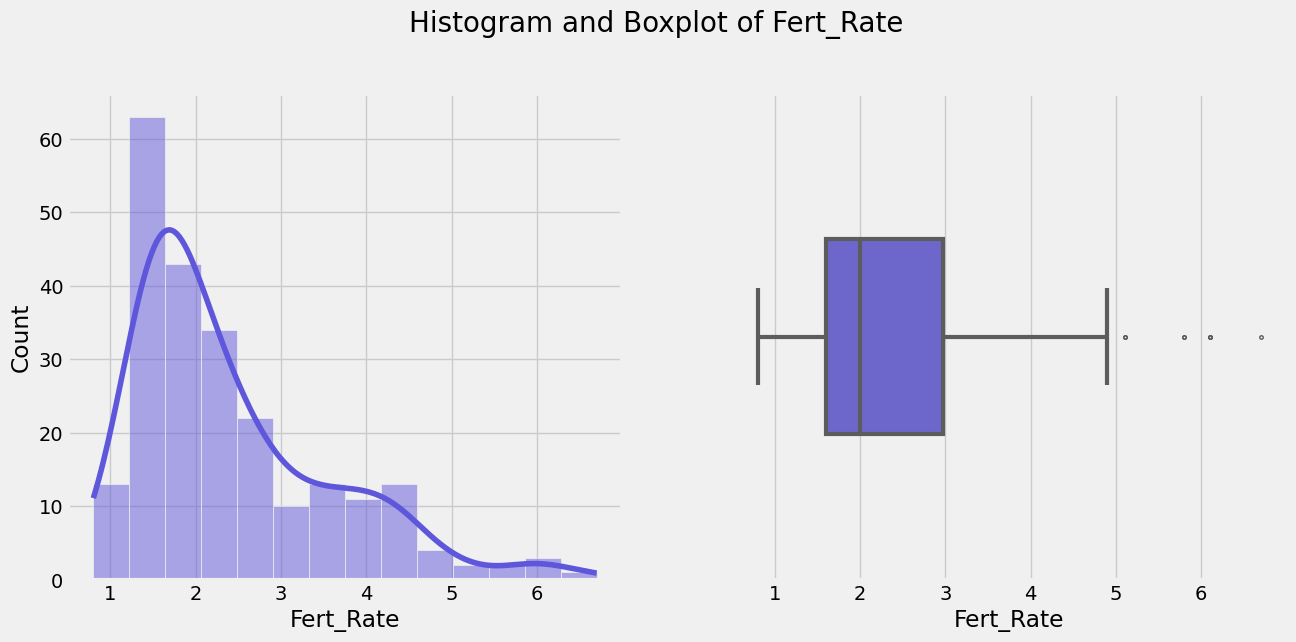

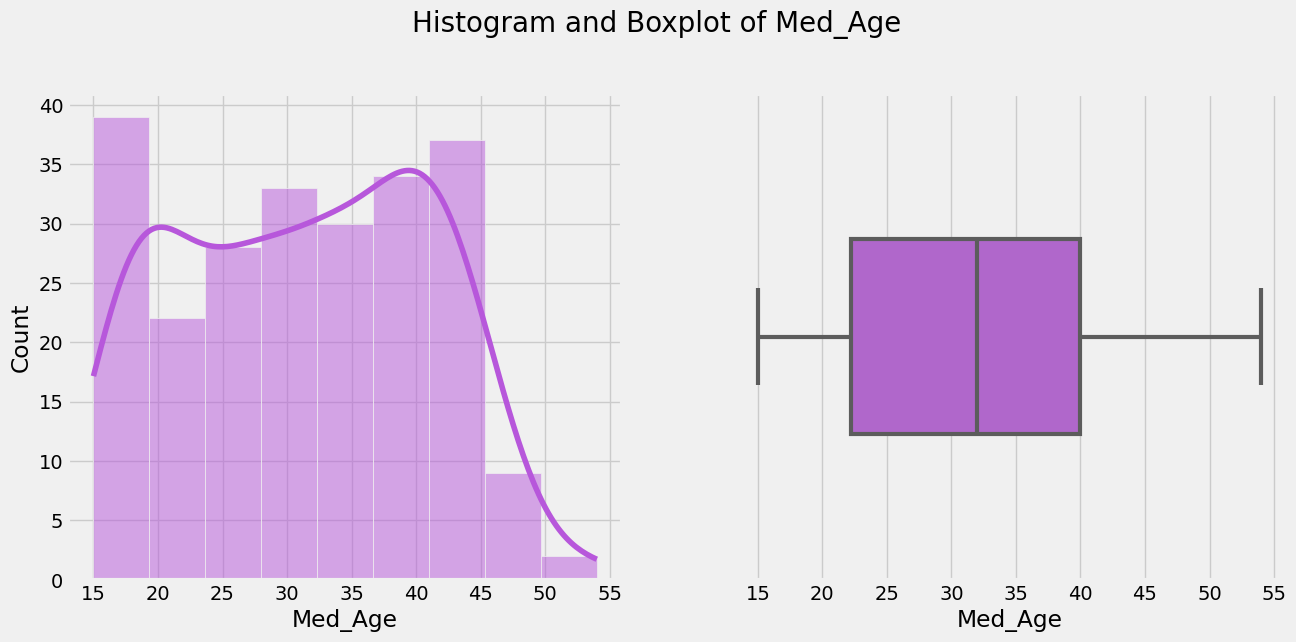

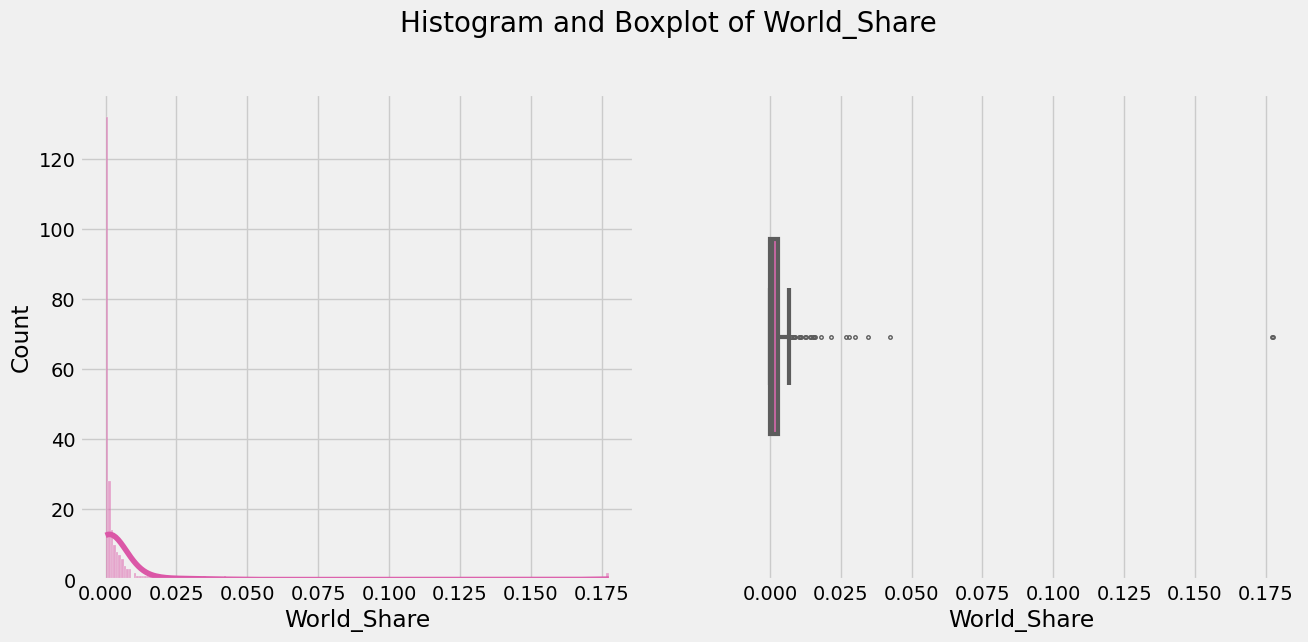

In [ ]:
fast_eda(data[num])

In [ ]:
max_mig=data.loc[data['Migrants'].idxmax()]
min_mig=data.loc[data['Migrants'].idxmin()]

max_Country=max_mig['Country']
max_Migrants=max_mig['Migrants']
max_Density=max_mig['Density']
max_pop=max_mig['Population']



min_Country=min_mig['Country']
min_Migrants=min_mig['Migrants']
min_Density=min_mig['Density']
min_pop=min_mig['Population']


# Print the result
print(f"The '{max_Country}' have maximum Migrants '{max_Migrants}' and Density of the country is '{max_Density}' and Population is '{max_pop}' ")
print(f"The '{min_Country}' have maximum Migrants '{min_Migrants}' and Density of the country is '{min_Density}' and Population is '{min_pop}' ")

The 'Ukraine' have maximum Migrants '1784718' and Density of the country is '63' and Population is '36744634' 
The 'Poland' have maximum Migrants '-910475' and Density of the country is '134' and Population is '41026067' 


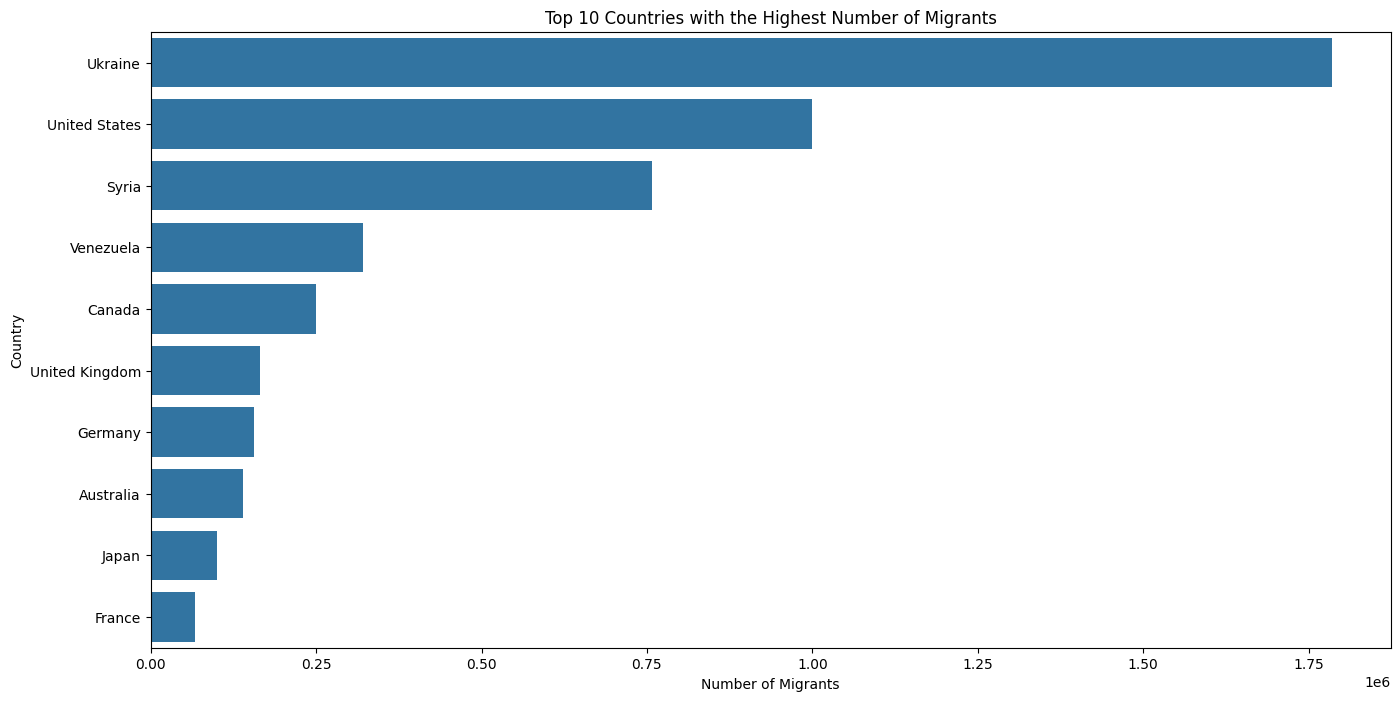

In [ ]:
top_10_migrants = data.sort_values(by='Migrants', ascending=False).head(10)

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(data=top_10_migrants, x='Migrants', y='Country')
plt.xlabel('Number of Migrants')
plt.ylabel('Country')
plt.title('Top 10 Countries with the Highest Number of Migrants')
plt.show()

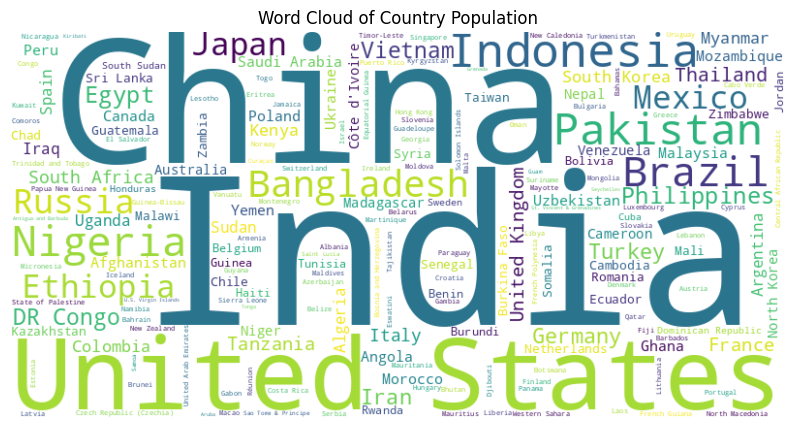

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'data' contains the necessary columns 'Country' and 'Population'
Country_count = data.groupby('Country')['Population'].sum().reset_index()

word_freq = {country: pop for country, pop in zip(Country_count['Country'], Country_count['Population'])}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Country Population')
plt.show()


# High Population Density Countries

In [ ]:
sorted_data=data.sort_values(by='Density',ascending=False)

top_countries=sorted_data.head(10)

fig = px.bar(top_countries, x='Country', y='Density', color='Country', labels={'Country': 'Country', 'Density': 'Population Density'})
fig.update_layout(title='Top 10 Countries with Highest Population Density')
fig.show()

# Data Modeling

In [ ]:
# Separate features and target variable
X = data[["Land_Area", "Density", "Fert_Rate"]]
y = data["Migrants"]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2147987185.375834


In [ ]:
# Define the feature values for India
India_features = [[2973190, 481, 2]]  # Land_Area, Density, Fertility_Rate

# Predict migration for India
India_migration = model.predict(India_features)

print("Predicted migration for India:", India_migration[0])

Predicted migration for India: 26033.161366333385


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

